# 6.2 Exploring relationships

### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#Import data
df = pd.read_csv(r"C:\Users\kelly\OneDrive\Desktop\Campsite Prepared Data\clean_campsite_data.csv")

In [4]:
df.dtypes

Unnamed: 0                 int64
longitude                float64
latitude                 float64
name                      object
park_type                 object
dates_open                object
comments                  object
num_sites                 object
elevation                float64
amenities                 object
state                     object
nearest_town_distance    float64
nearest_town_bearing      object
city                      object
dtype: object

### 2. Variables for exploratory visual analysis

In [36]:
# Create a subset excluding the "comments", "nearest_town_bearing" columns

sub_1 = df[['longitude', 'latitude', 'name', 'park_type','dates_open', 'num_sites', 'elevation', 'amenities', 'state', 'nearest_town_distance', 'city']]

In [10]:
#Drop the Rows with NaN Values
df=df.dropna()
print (df)

      Unnamed: 0  longitude  latitude  \
51          1091    -88.324    46.325   
56          1196    -88.402    46.531   
163         2119   -103.363    48.279   
261         2261   -101.327    47.615   
335         2374    -98.077    41.987   
...          ...        ...       ...   
4971       10834    -85.357    35.655   
4979       10858    -83.934    35.639   
4996       10935   -103.787    30.946   
5018       11068   -106.498    31.905   
5029       11102   -106.043    31.927   

                                                 name park_type  \
51                           Deer Lake - State Forest        SF   
56             King Lake - Copper County State Forest        SF   
163                                    Epping RV Park        CP   
261                        Sportsmens Centennial Park        CP   
335                                   Elgin City Park        CP   
...                                               ...       ...   
4971                      Fall Creek F

### 3. Create a correlation matrix heatmap (colored).

### Correlations:

In [37]:
#Create a correlation matrix using pandas
sub_1.corr()

longitude  latitude  elevation  nearest_town_distance
longitude               1.000000 -0.142105  -0.351213              -0.210995
latitude               -0.142105  1.000000  -0.212507               0.096816
elevation              -0.351213 -0.212507   1.000000               0.124092
nearest_town_distance  -0.210995  0.096816   0.124092               1.000000

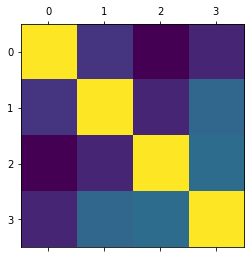

In [38]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_1.corr())
plt.show()

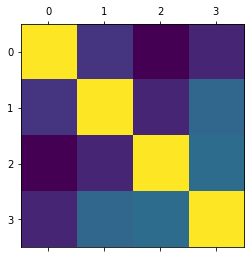

In [39]:
# Save figure
plt.matshow(sub_1.corr())
plt.savefig("out.png") 

In [40]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\kelly'

Text(0.5, 1.0, 'Correlation Matrix')

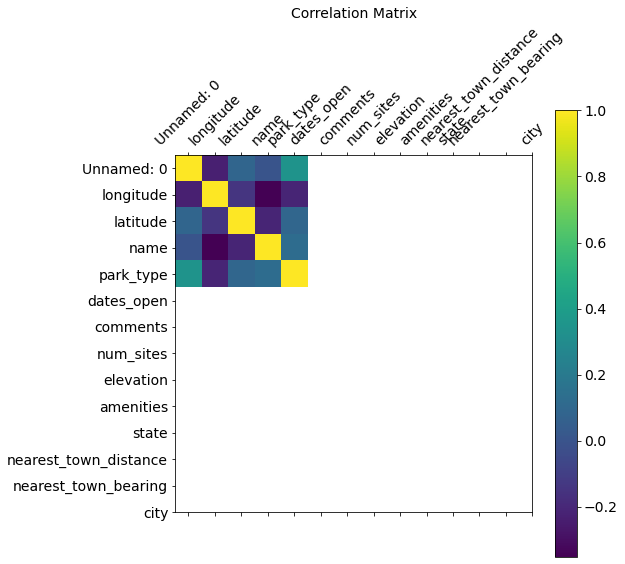

In [41]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Create a correlation heatmap using seaborn:

In [32]:
df.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'name', 'park_type',
       'dates_open', 'comments', 'num_sites', 'elevation', 'amenities',
       'state', 'nearest_town_distance', 'nearest_town_bearing', 'city'],
      dtype='object')

In [33]:
# Create a subset excluding the "comments", "nearest_town_bearing" columns

sub = df[['longitude', 'latitude', 'name', 'park_type','dates_open', 'num_sites', 'elevation', 'amenities', 'state', 'nearest_town_distance', 'city']]

In [34]:
sub

longitude  latitude                                             name  \
51      -88.324    46.325                         Deer Lake - State Forest   
56      -88.402    46.531           King Lake - Copper County State Forest   
163    -103.363    48.279                                   Epping RV Park   
261    -101.327    47.615                       Sportsmens Centennial Park   
335     -98.077    41.987                                  Elgin City Park   
...         ...       ...                                              ...   
4971    -85.357    35.655                      Fall Creek Falls State Park   
4979    -83.934    35.639  Look Rock - Great Smoky Mountains National Park   
4996   -103.787    30.946                             Balmorhea State Park   
5018   -106.498    31.905          Franklin Mt. State Park - Tom Mays Unit   
5029   -106.043    31.927                  Hueco Tanks State Historic Site   

     park_type          dates_open num_sites  elevation  \
51          SF            all year        12     1569.0   
56          SF            all year         6     1662.0   
163         CP   early may-mid oct        12     2203.0   
261         CP  early may-late sep       121     1869.0   
335         CP   early may-mid oct         8     1926.0   
...        ...                 ...       ...        ...   
4971        SP            all year       238     1764.0   
4979        NP     mid may-mid oct        68     2505.0   
4996        SP            all year        34     3314.0   
5018        SP            all year        15     4500.0   
5029        SP            all year        20     4527.0   

                  amenities state  nearest_town_distance           city  
51                    NH NR    MI                   15.7  Crystal Falls  
56                    NH NR    MI                    6.5      Covington  
163                  WES DP    ND                    0.3         Epping  
261              E FT DW SH    ND                    4.8       Garrison  
335      WES DP FT DW SH L$    NE                    0.4          Elgin  
...                     ...   ...                    ...            ...  
4971         WE DP DW SH RS    TN                   10.0      Pikeville  
4979         NH DP DW NS NR    TN                    7.3      Chilhowee  
4996     E DP 45ft DW SH RS    TX                    0.2      Toyahvale  
5018      NH ND VT NW NS RS    TX                   10.1        El Paso  
5029  E DP 40ft FT DW SH RS    TX                   28.5        El Paso  

[150 rows x 11 columns]

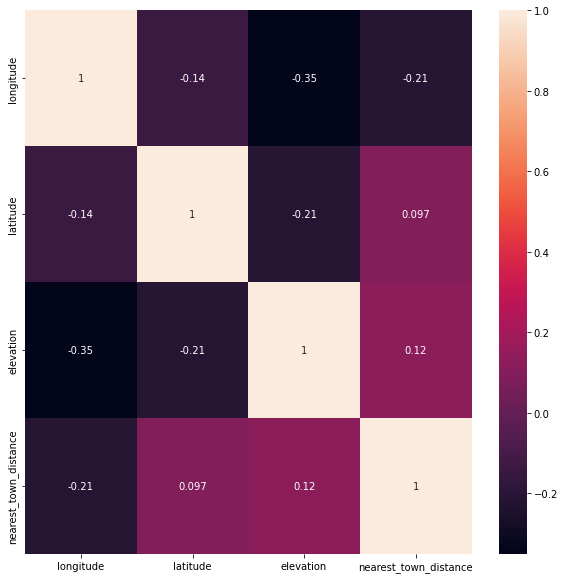

In [35]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Relationship between variables:
I'm not sure why my results are in the corner using matplotlib.  It makes it very difficult to pull any correlations between the variables.  The correlation heatmap using seaborn is much easier to read.  I have a lot of purple which shows there is no relationship between the variables. The dark purple and black show negative correlations.  The elevation variable seems to have the most positive correlation on the heatmap.  What factors have the most impact on the elevation of a campsite?  

### 4. Scatterplots

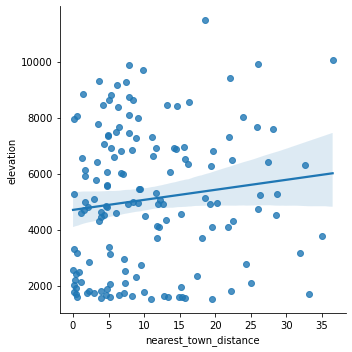

In [42]:
# Create a scatterplot for the "elevation" and "nearest_town_distance" columns in seaborn

sns.lmplot(x = 'nearest_town_distance', y = 'elevation', data = df)

#### Output relationship

There are many points that are far away from the line, however there seems to be a positive coorelation betwen the nearest town and the elevation of a campsite.  There are a lot of outliers.  Overall, there is an upward trend.  Does that mean the higher the elevation, the closer the campsites are to a town? 

### 5. Create a Pair Plot

In [43]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['nearest_town_distance', 'elevation', 'num_sites']]

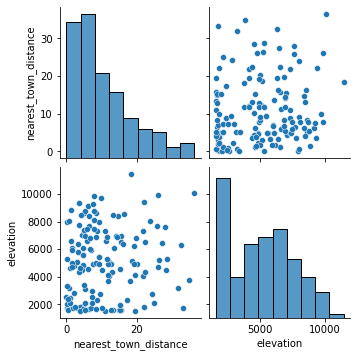

In [44]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### Comments

I tried to use the num_sites in the pair plot, but it didn't include this information.  These results seem as varied as the previous scatterplot.  I don't think I can gain much new information from these charts. 

### 6. Categorical plot

#### Creating a categorical variable that splits the "Price per Unit" column into categories

<AxesSubplot:xlabel='elevation', ylabel='Count'>

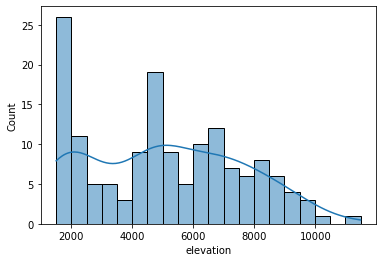

In [46]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['elevation'], bins = 20, kde = True)

In [47]:
df.loc[df['elevation'] < 2000, 'elevation category'] = 'Low elevation'

In [48]:
df.loc[(df['elevation'] >= 2000) & (df['elevation'] < 5000), 'elevation category'] = 'Middle elevation'

In [49]:
df.loc[df['elevation'] >= 5000, 'elevation category'] = 'High elevation'

In [50]:
df['elevation category'].value_counts(dropna = False)

High elevation      73
Middle elevation    51
Low elevation       26
Name: elevation category, dtype: int64

In [51]:
df.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'name', 'park_type',
       'dates_open', 'comments', 'num_sites', 'elevation', 'amenities',
       'state', 'nearest_town_distance', 'nearest_town_bearing', 'city',
       'elevation category'],
      dtype='object')

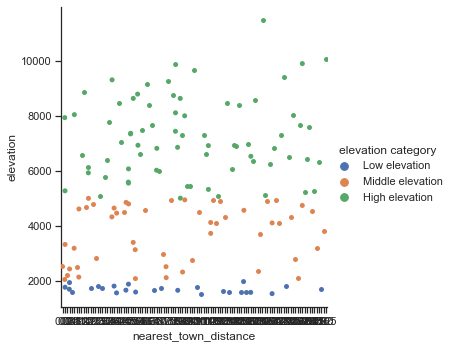

In [52]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="nearest_town_distance", y="elevation", hue="elevation category", data=df)

#### Results

There seems to be less towns that are closer to lower elevation campsites.  The lower the elevation, the fewer the campsites with towns close to them.  There seems to be more campsites with towns that are closer to them with higher elevation.  This surprises me.  I would think higher elevation campsites would be more deserted and farther away from towns.  

#### Questions from Task 6.1

What are the top 5 campsites travelers like to visit? 
I didn't find the answer to this question.

Do the amenities offered impact the number of visitors?
I didn't find the answer to this question.

Are campsites closer to town more popular than campsites farther away from town?
I didn't find out whether they are more popular or not, but I did find that the higher the elevation, the closer the campsite is to a town.

Do campers like to visit campsites that are open all year more than seasonal campsites?
I didn't find the answer to this question.

Which type of campsite do people like to visit more (Federal, State, or Local)?
I didn't find the answer to this question.

#### New questions from this task:
What factors have the most impact on the elevation of a campsite?

Does that mean the higher the elevation, the closer the campsites are to a town?
The answer to this was yes.

#### Hypotheses
If a campsite is located in a warmer state, there will be more sites at that site.
There are a greater number of campsites with more than 1 amenity.  
I wonder if I can find data that shows the number of visitors at each campsite throughout the year.